# Ingest and View Data

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
POSTGRES_USERNAME = 'root'
POSTGRES_PASSWORD = 'koBREipm4h7CuRKix2Tn'
POSTGRES_HOSTNAME = 'database-1.c3ma8u2guxxs.us-east-2.rds.amazonaws.com'
POSTGRES_PORT = '5432'
POSTGRES_DBNAME = 'postgres'

connection_string = f"postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_HOSTNAME}:{POSTGRES_PORT}/{POSTGRES_DBNAME}"
engine = create_engine(connection_string)

In [3]:
query = """
SELECT * FROM darwin
"""

df = pd.read_sql(query, engine)

In [4]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202407037139232,G39232,2024-07-03,TD,SCROYDN,None,19:31:00,19:31:30,19:31:00,19:31:00,...,4,10.0,None,None,None,None,False,False,None,None
1,202407036785172,C85172,2024-07-03,CIS,LIVSTLL,None,19:37:00,19:38:00,19:37:00,19:38:00,...,A,NaN,None,None,None,None,False,False,None,None
2,202407036735756,C35756,2024-07-03,TD,ESTHRAK,None,19:30:30,19:31:00,19:31:00,19:31:00,...,2,NaN,None,None,None,None,False,False,None,None
3,202407036735756,C35756,2024-07-03,TD,BRMB,None,19:33:00,19:33:30,19:33:00,19:33:00,...,1,NaN,None,None,None,None,False,False,None,None
4,202407036735756,C35756,2024-07-03,TD,BRMBRK,None,19:35:00,19:35:30,19:35:00,19:35:00,...,2,NaN,None,None,None,None,False,False,None,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68617 entries, 0 to 68616
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                68617 non-null  object 
 1   unique_id               68617 non-null  object 
 2   service_start_date      68617 non-null  object 
 3   update_origin           67309 non-null  object 
 4   train_platform          68617 non-null  object 
 5   working_time_pass       0 non-null      object 
 6   working_time_arrival    68617 non-null  object 
 7   working_time_departure  68617 non-null  object 
 8   planned_time_arrival    64077 non-null  object 
 9   planned_time_departure  63930 non-null  object 
 10  actual_arrival_time     59962 non-null  object 
 11  actual_departure_time   65061 non-null  object 
 12  platform                64696 non-null  object 
 13  train_length            21269 non-null  float64
 14  estimated_time          0 non-null    

# Clean DF 
**Drop Null Columns and Unnecessary Columns**

In [6]:
# columns to drop due to null values
columns_to_drop = [
    'working_time_pass',
    'estimated_time',
    'source',
    'actual_time',
    'actual_time_class',
    'source_instance',
    'estimated_time_minutes',
    'train_length'            
]

df_cleaned = df.drop(columns=columns_to_drop)

In [7]:
# check duplicates
duplicates = df_cleaned.duplicated().sum()
duplicates

4008

In [8]:
# to drop duplicates
# df_clean = df_clean.drop_duplicates()

In [9]:
# check nulls
df_cleaned.isna().sum()

route_id                     0
unique_id                    0
service_start_date           0
update_origin             1308
train_platform               0
working_time_arrival         0
working_time_departure       0
planned_time_arrival      4540
planned_time_departure    4687
actual_arrival_time       8655
actual_departure_time     3556
platform                  3921
is_delayed_arrival           0
is_delayed_departure         0
dtype: int64

In [10]:
# to drop remaining nulls
# df_cleaned = df_cleaned.dropna()

# Adding Duration Column

In [11]:
df_time = df_cleaned

In [12]:
df_time['working_time_arrival'] = pd.to_datetime(df_time['working_time_arrival'], format='%H:%M:%S')
df_time['working_time_departure'] = pd.to_datetime(df_time['working_time_departure'], format='%H:%M:%S')

In [13]:
df_time['duration (min)'] = (df_time['working_time_departure'] - df_time['working_time_arrival']).dt.total_seconds()/60

In [14]:
df_time['working_time_arrival'] = df_time['working_time_arrival'].dt.time
df_time['working_time_departure'] = df_time['working_time_departure'].dt.time

In [46]:
df_time = df_cleaned
df_cleaned.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,is_delayed_arrival,is_delayed_departure,duration (min)
0,202407037139232,G39232,2024-07-03,TD,SCROYDN,19:31:00,19:31:30,19:31:00,19:31:00,None,19:32:00,4,False,False,0.5
1,202407036785172,C85172,2024-07-03,CIS,LIVSTLL,19:37:00,19:38:00,19:37:00,19:38:00,19:37:00,19:38:00,A,False,False,1.0
2,202407036735756,C35756,2024-07-03,TD,ESTHRAK,19:30:30,19:31:00,19:31:00,19:31:00,None,None,2,False,False,0.5
3,202407036735756,C35756,2024-07-03,TD,BRMB,19:33:00,19:33:30,19:33:00,19:33:00,19:33:00,19:33:00,1,False,False,0.5
4,202407036735756,C35756,2024-07-03,TD,BRMBRK,19:35:00,19:35:30,19:35:00,19:35:00,19:35:00,19:35:00,2,False,False,0.5


# Ingest Rail References Data

In [16]:
reference_df = pd.read_csv('./raw_data/RailReferences.csv')
reference_df.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


## Convert Easting, Northing to Latitude and Longitude

In [17]:
!pip install pyproj

In [18]:
from pyproj import Transformer

In [19]:
#  Define the British National Grid projection (EPSG:27700) and WGS84
osgb_projection = 'epsg:27700'  # British National Grid
wgs84_projection = 'epsg:4326'  # WGS84

In [20]:
# Initialize the transformer
transformer = Transformer.from_crs(osgb_projection, wgs84_projection)

In [21]:
# Function to convert British National Grid to latitude and longitude
def convert_osgb_to_latlong(easting, northing):
    longitude, latitude = transformer.transform(easting, northing)
    return longitude, latitude

In [22]:
# Apply conversion to the DataFrame and create new columns Latitude and Longitude
reference_df[['Latitude', 'Longitude']] = reference_df.apply(lambda row: convert_osgb_to_latlong(row['Easting'], row['Northing']),\
                                         axis=1,\
                                         result_type='expand')

In [23]:
# Data need for analysis 
data = reference_df[['TiplocCode', 'StationName', 'Latitude', 'Longitude']]
data

,TiplocCode,StationName,Latitude,Longitude
0,PENZNCE,Penzance Rail Station,50.121672,-5.532565
1,STIVES,St Ives (Cornwall) Rail Station,50.209043,-5.477912
2,CARBISB,Carbis Bay Rail Station,50.197048,-5.463263
3,STERTH,St Erth Rail Station,50.170489,-5.444252
4,LELANTS,Lelant Saltings Rail Station,50.178775,-5.440926
...,...,...,...,...
2623,SMRLYTN,Somerleyton Rail Station,52.510229,1.652260
2624,OULTNBS,Oulton Broad South Rail Station,52.469602,1.707659
2625,YARMTH,Great Yarmouth Rail Station,52.612158,1.720886
2626,OULTNBN,Oulton Broad North Rail Station,52.477759,1.715711


### Data Enrichment
Used this section to add identifying information for top Timing Point Locations (*TiplocCode*) not already identified in the supplied "RailReferences.csv" data. 

Research indicates that the Timing Point Location for BONDST, correlates to Bond Street Station$^{1}$ located at 51.514°N, 0.15°W$^{2}$. 

In [24]:
new_row = pd.DataFrame([['BONDST', 'Bond Street Station', 51.514, -0.15]], columns=data.columns)
data = pd.concat([data, new_row], ignore_index=True)

In [25]:
data

,TiplocCode,StationName,Latitude,Longitude
0,PENZNCE,Penzance Rail Station,50.121672,-5.532565
1,STIVES,St Ives (Cornwall) Rail Station,50.209043,-5.477912
2,CARBISB,Carbis Bay Rail Station,50.197048,-5.463263
3,STERTH,St Erth Rail Station,50.170489,-5.444252
4,LELANTS,Lelant Saltings Rail Station,50.178775,-5.440926
...,...,...,...,...
2624,OULTNBS,Oulton Broad South Rail Station,52.469602,1.707659
2625,YARMTH,Great Yarmouth Rail Station,52.612158,1.720886
2626,OULTNBN,Oulton Broad North Rail Station,52.477759,1.715711
2627,LOWSTFT,Lowestoft Rail Station,52.474436,1.749708


### Bibliography

1. http://www.railwaycodes.org.uk/crs/crsb.shtm

2. https://en.wikipedia.org/wiki/Bond_Street_station

## Using Rail References to Replace Train Platform with Station Name

In [26]:
# Merge df_cleaned with data columns from reference_df

df_merged = df_cleaned.merge(data, left_on='train_platform', right_on='TiplocCode', how='left')

In [27]:
# check
df_merged.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,is_delayed_arrival,is_delayed_departure,duration (min),TiplocCode,StationName,Latitude,Longitude
0,202407037139232,G39232,2024-07-03,TD,SCROYDN,19:31:00,19:31:30,19:31:00,19:31:00,None,19:32:00,4,False,False,0.5,SCROYDN,South Croydon Rail Station,51.362963,-0.093457
1,202407036785172,C85172,2024-07-03,CIS,LIVSTLL,19:37:00,19:38:00,19:37:00,19:38:00,19:37:00,19:38:00,A,False,False,1.0,NaN,NaN,NaN,NaN
2,202407036735756,C35756,2024-07-03,TD,ESTHRAK,19:30:30,19:31:00,19:31:00,19:31:00,None,None,2,False,False,0.5,ESTHRAK,Eastham Rake Rail Station,53.307537,-2.981132
3,202407036735756,C35756,2024-07-03,TD,BRMB,19:33:00,19:33:30,19:33:00,19:33:00,19:33:00,19:33:00,1,False,False,0.5,BRMB,Bromborough Rail Station,53.321845,-2.986895
4,202407036735756,C35756,2024-07-03,TD,BRMBRK,19:35:00,19:35:30,19:35:00,19:35:00,19:35:00,19:35:00,2,False,False,0.5,BRMBRK,Bromborough Rake Rail Station,53.329905,-2.989469


In [28]:
# easier view
df_merged[['train_platform', 'TiplocCode', 'StationName']].head(10)

,train_platform,TiplocCode,StationName
0,SCROYDN,SCROYDN,South Croydon Rail Station
1,LIVSTLL,NaN,NaN
2,ESTHRAK,ESTHRAK,Eastham Rake Rail Station
3,BRMB,BRMB,Bromborough Rail Station
4,BRMBRK,BRMBRK,Bromborough Rake Rail Station
5,SPITAL,SPITAL,Spital Rail Station
6,PSLT,PSLT,Port Sunlight Rail Station
7,BEBNGTN,BEBNGTN,Bebington Rail Station
8,ROCKFRY,ROCKFRY,Rock Ferry Rail Station
9,RADYR,RADYR,Radyr Rail Station


In [29]:
# checking where train_platform has no related StationName/Tiploccode
nan_rows = df_merged[df_merged[['TiplocCode', 'StationName']].isna().any(axis=1)]

nan_rows[['train_platform', 'TiplocCode', 'StationName']]

,train_platform,TiplocCode,StationName
1,LIVSTLL,NaN,NaN
16,WOLWXR,NaN,NaN
23,FRMPKRS,NaN,NaN
24,HRNS451,NaN,NaN
25,BOWERRL,NaN,NaN
...,...,...,...
68399,DORK35,NaN,NaN
68403,HLWY326,NaN,NaN
68418,CRGNTYJ,NaN,NaN
68546,WCHAPXR,NaN,NaN


In [30]:
# Identifying most highly frequented unknown Station Names
station_NaN = df_merged[df_merged['StationName'].isna()]['train_platform'].value_counts()
station_NaN.head(20)

train_platform
WCHAPXR    240
LIVSTLL    237
FRNDXR     237
TOTCTRD    226
PADTLL     135
CANWHRF    133
CUSTMHS    125
WOLWXR     124
MAGHNTH    104
BRENTX      87
STALBCS     87
LTCEADL     55
BOWERRL     54
CNNBELL     51
LTCEREC     49
CLPHMYM     43
CRKLREC     42
PALL        40
MLLF        40
UNIV        37
Name: count, dtype: int64

In [31]:
# fill NaN values in the StationName column with the corresponding train_platform values
df_merged['StationName'] = df_merged['StationName'].fillna(df_merged['train_platform'])

# Drop TiplocCode to avoid redundency
# df_merged.drop(columns=['TiplocCode'], inplace=True)

# Replace 'Rail Station' with an empty string to make more readable
df_merged['StationName'] = df_merged['StationName'].str.replace(' Rail Station', '')

In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68617 entries, 0 to 68616
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                68617 non-null  object 
 1   unique_id               68617 non-null  object 
 2   service_start_date      68617 non-null  object 
 3   update_origin           67309 non-null  object 
 4   train_platform          68617 non-null  object 
 5   working_time_arrival    68617 non-null  object 
 6   working_time_departure  68617 non-null  object 
 7   planned_time_arrival    64077 non-null  object 
 8   planned_time_departure  63930 non-null  object 
 9   actual_arrival_time     59962 non-null  object 
 10  actual_departure_time   65061 non-null  object 
 11  platform                64696 non-null  object 
 12  is_delayed_arrival      68617 non-null  bool   
 13  is_delayed_departure    68617 non-null  bool   
 14  duration (min)          68617 non-null

# Delays

In [33]:
# Create the 'delayed' column
df_merged['delayed'] = df_merged['is_delayed_arrival'] | df_merged['is_delayed_departure']

# Check
df_merged.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,is_delayed_arrival,is_delayed_departure,duration (min),TiplocCode,StationName,Latitude,Longitude,delayed
0,202407037139232,G39232,2024-07-03,TD,SCROYDN,19:31:00,19:31:30,19:31:00,19:31:00,None,19:32:00,4,False,False,0.5,SCROYDN,South Croydon,51.362963,-0.093457,False
1,202407036785172,C85172,2024-07-03,CIS,LIVSTLL,19:37:00,19:38:00,19:37:00,19:38:00,19:37:00,19:38:00,A,False,False,1.0,NaN,LIVSTLL,NaN,NaN,False
2,202407036735756,C35756,2024-07-03,TD,ESTHRAK,19:30:30,19:31:00,19:31:00,19:31:00,None,None,2,False,False,0.5,ESTHRAK,Eastham Rake,53.307537,-2.981132,False
3,202407036735756,C35756,2024-07-03,TD,BRMB,19:33:00,19:33:30,19:33:00,19:33:00,19:33:00,19:33:00,1,False,False,0.5,BRMB,Bromborough,53.321845,-2.986895,False
4,202407036735756,C35756,2024-07-03,TD,BRMBRK,19:35:00,19:35:30,19:35:00,19:35:00,19:35:00,19:35:00,2,False,False,0.5,BRMBRK,Bromborough Rake,53.329905,-2.989469,False


## Delays  by Route

In [50]:
# Extract the necessary columns
df_extracted = df_merged[['route_id', 'delayed']]

# Calculate the count of delays for each route_id and TiplocCode
delay_counts_by_route = df_extracted.groupby('route_id')['delayed'].sum().reset_index()
delay_counts_by_route.rename(columns={'delayed': 'delay_counts_by_route'}, inplace=True)

# Calculate the total count of records for each route_id and TiplocCode
total_counts_by_route = df_extracted.groupby('route_id')['route_id'].count().reset_index(name='total_counts_by_route')

# Merge the delay counts and total counts
delay_summary = delay_counts_by_route.merge(total_counts_by_route, on='route_id')

# Calculate the % delayed for each route_id
delay_summary['%_delayed_by_route'] = (delay_summary['delay_counts_by_route'] / delay_summary['total_counts_by_route']) * 100

# Select the relevant columns
delays_by_route = delay_summary[['route_id', 'delay_counts_by_route', 'total_counts_by_route', '%_delayed_by_route']]

# Check
delays_by_route

,route_id,delay_counts_by_route,total_counts_by_route,%_delayed_by_route
0,202407036704095,0,1,0.000000
1,202407036704542,0,1,0.000000
2,202407036705093,1,7,14.285714
3,202407036705096,0,13,0.000000
4,202407036705102,0,5,0.000000
...,...,...,...,...
15311,202407096721743,0,18,0.000000
15312,202407096721759,0,9,0.000000
15313,202407096721783,0,10,0.000000
15314,202407096731524,0,6,0.000000


In [35]:
# export delay routes csv
delays_route = delays_by_route.to_csv('./cleaned_data/delays_by_route.csv', index=False, mode = 'w+')

## Delays by Station Name

In [36]:
df_extracted2 = df_merged[['StationName', 'TiplocCode', 'delayed', 'Latitude', 'Longitude']]

# Calculate the count of delays for each StationName
delay_counts_by_station = df_extracted2.groupby('StationName')['delayed'].sum().reset_index()
delay_counts_by_station.rename(columns={'delayed': 'delay_counts_by_station'}, inplace=True)

# Calculate the total count of records for each StationName
total_counts_by_station = df_extracted2.groupby('StationName')['StationName'].count().reset_index(name='total_counts_by_station')

# Merge the delay counts and total counts
delay_summary_station = delay_counts_by_station.merge(total_counts_by_station, on='StationName')

# Calculate the % delayed for each StationName
delay_summary_station['%_delayed_by_station'] = (delay_summary_station['delay_counts_by_station'] / delay_summary_station['total_counts_by_station']) * 100

# Select the relevant columns
delays_by_station = delay_summary_station[['StationName', 'delay_counts_by_station', 'total_counts_by_station', '%_delayed_by_station']]

# Merge the dataframes on 'StationName' to add latitude and longitude
delays_by_station = pd.merge(delays_by_station, df_extracted2[['StationName', 'TiplocCode', 'Latitude', 'Longitude']].drop_duplicates(), on='StationName', how='left')

# Check
delays_by_station

,StationName,delay_counts_by_station,total_counts_by_station,%_delayed_by_station,TiplocCode,Latitude,Longitude
0,ABHLJN,8,23,34.782609,NaN,NaN,NaN
1,ABRD27,0,1,0.000000,NaN,NaN,NaN
2,ALSTONS,5,10,50.000000,NaN,NaN,NaN
3,ARBRUNS,0,2,0.000000,NaN,NaN,NaN
4,ARMLJCN,0,1,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2721,Yoker,2,51,3.921569,YOKER,55.892585,-4.386287
2722,York,71,341,20.821114,YORK,53.957964,-1.093182
2723,Yorton,0,2,0.000000,YORTON,52.808955,-2.736461
2724,Ystrad Mynach,2,36,5.555556,YSTRADM,51.640933,-3.241295


In [37]:
# exporting delays by station to csv
delay_stations = delays_by_station.to_csv('./cleaned_data/delays_by_station.csv', index=False, mode = 'w+')

In [38]:
# check how is_delayed arrivals/departures compare with delayed column
df_merged['is_delayed_arrival'].value_counts()

is_delayed_arrival
False    63275
True      5342
Name: count, dtype: int64

In [39]:
df_merged['is_delayed_departure'].value_counts()

is_delayed_departure
False    63010
True      5607
Name: count, dtype: int64

In [40]:
df_merged['delayed'].value_counts()

delayed
False    63010
True      5607
Name: count, dtype: int64

Delayed column has same counts as is_delayed_departure. 

# Value Counts for Analysis 

In [41]:
df_merged['service_start_date'].value_counts()

service_start_date
2024-07-05    26206
2024-07-04    13486
2024-07-06    10258
2024-07-07     8225
2024-07-08     6770
2024-07-03     3610
2024-07-09       62
Name: count, dtype: int64

In [42]:
# most popular routes
df_merged['route_id'].value_counts()

route_id
202407047154179    141
202407046748489     96
202407047513588     92
202407057513588     91
202407076785195     84
                  ... 
202407066775952      1
202407068096985      1
202407066705662      1
202407066747453      1
202407087657633      1
Name: count, Length: 15316, dtype: int64

In [43]:
df_merged['StationName'].value_counts()

StationName
London Bridge            444
Clapham Junction         388
York                     341
East Croydon             265
Birmingham New Street    254
                        ... 
LOWF203                    1
NTHMRCL                    1
ERLSUDL                    1
CHALLOW                    1
St Budeaux Ferry Road      1
Name: count, Length: 2716, dtype: int64

# Visuals 

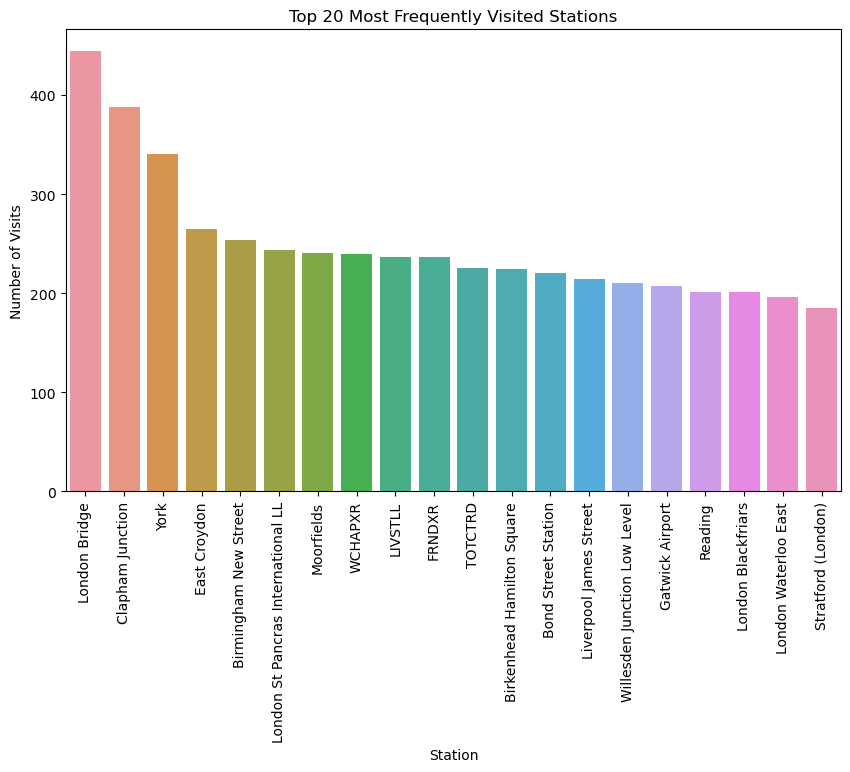

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# Top 10 most frequently visited stations
top_stations = df_merged['StationName'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stations.index, y=top_stations.values)
plt.title('Top 20 Most Frequently Visited Stations')
plt.xlabel('Station')
plt.ylabel('Number of Visits')
plt.xticks(rotation=90)
plt.show()

# Export Desired Dataframe

In [45]:
output = df_merged.to_csv('./cleaned_data/UK_Rail_Data.csv', index=False, mode = 'w+')